<a href="https://colab.research.google.com/github/CodingWithMK/Global_AI_Hub_Melbourne_Housing_Price_Predictions_ML_Project/blob/main/Global_AI_Hub_Melbourne_Housing_Price_Predictions_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
import sklearn.tree
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy import stats

# **Gathering and Observing Data**

In [53]:
# Loading dataset to the project
df = pd.read_csv("Melbourne_housing_FULL.csv")

In [54]:
# Observing the first five columns
df.head(5)

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN  Yarra City Council  -37.8014    144.9958  Northern Metropolitan   
1        NaN  Yarra City Council  -37.7996    144.9984  Northern Metropolitan   
2     1900.0  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   
3        NaN  Yarra City Council  -37.8114    145.0116  Northern Metropolitan   
4     1900.0  Yarra City Council  -37.8093    144.9944  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [55]:
print(df.shape)

(34857, 21)


In [56]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [57]:
df.size

731997

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

#**Exploratory Data Analysis**

In [59]:
# Examining and displaying the descriptive statistics of the dataset
descriptive_statistics = df.describe()
print(descriptive_statistics)

              Rooms         Price      Distance      Postcode      Bedroom2  \
count  34857.000000  2.724700e+04  34856.000000  34856.000000  26640.000000   
mean       3.031012  1.050173e+06     11.184929   3116.062859      3.084647   
std        0.969933  6.414671e+05      6.788892    109.023903      0.980690   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.350000e+05      6.400000   3051.000000      2.000000   
50%        3.000000  8.700000e+05     10.300000   3103.000000      3.000000   
75%        4.000000  1.295000e+06     14.000000   3156.000000      4.000000   
max       16.000000  1.120000e+07     48.100000   3978.000000     30.000000   

           Bathroom           Car       Landsize  BuildingArea     YearBuilt  \
count  26631.000000  26129.000000   23047.000000   13742.00000  15551.000000   
mean       1.624798      1.728845     593.598993     160.25640   1965.289885   
std        0.724212      1.010771    3398.841946

In [60]:
# Converting object variables to categorical
categorical_columns = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']
df[categorical_columns] = df[categorical_columns].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34857 non-null  category
 1   Address        34857 non-null  category
 2   Rooms          34857 non-null  int64   
 3   Type           34857 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34857 non-null  category
 6   SellerG        34857 non-null  category
 7   Date           34857 non-null  category
 8   Distance       34856 non-null  float64 
 9   Postcode       34856 non-null  float64 
 10  Bedroom2       26640 non-null  float64 
 11  Bathroom       26631 non-null  float64 
 12  Car            26129 non-null  float64 
 13  Landsize       23047 non-null  float64 
 14  BuildingArea   13742 non-null  float64 
 15  YearBuilt      15551 non-null  float64 
 16  CouncilArea    34854 non-null  category
 17  Lattitude      26881 non-null  

In [61]:
# Checking for duplicate data and removing them
duplicate_rows = df[df.duplicated()]

# Displaying duplicate data
print(f"Duplicate Rows: \n{duplicate_rows}")

df_clear = df.drop_duplicates()
df_clear.head(20)

Duplicate Rows: 
           Suburb        Address  Rooms Type  Price Method SellerG  \
15858  Nunawading  1/7 Lilian St      3    t    NaN     SP  Jellis   

             Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
15858  17/06/2017      15.4    3131.0  ...       3.0  2.0     405.0   

       BuildingArea  YearBuilt              CouncilArea Lattitude  Longtitude  \
15858         226.0     2000.0  Manningham City Council -37.82678   145.16777   

                 Regionname Propertycount  
15858  Eastern Metropolitan        4973.0  

[1 rows x 21 columns]


Suburb              Address  Rooms Type      Price Method  SellerG  \
0   Abbotsford        68 Studley St      2    h        NaN     SS   Jellis   
1   Abbotsford         85 Turner St      2    h  1480000.0      S   Biggin   
2   Abbotsford      25 Bloomburg St      2    h  1035000.0      S   Biggin   
3   Abbotsford   18/659 Victoria St      3    u        NaN     VB   Rounds   
4   Abbotsford         5 Charles St      3    h  1465000.0     SP   Biggin   
5   Abbotsford     40 Federation La      3    h   850000.0     PI   Biggin   
6   Abbotsford          55a Park St      4    h  1600000.0     VB   Nelson   
7   Abbotsford         16 Maugie St      4    h        NaN     SN   Nelson   
8   Abbotsford         53 Turner St      2    h        NaN      S   Biggin   
9   Abbotsford         99 Turner St      2    h        NaN      S  Collins   
10  Abbotsford       129 Charles St      2    h   941000.0      S   Jellis   
11  Abbotsford         124 Yarra St      3    h  1876000.0      S   Nelson   
12  Abbotsford  121/56 Nicholson St      2    u        NaN     PI   Biggin   
13  Abbotsford        17 Raphael St      4    h        NaN      W   Biggin   
14  Abbotsford        98 Charles St      2    h  1636000.0      S   Nelson   
15  Abbotsford     217 Langridge St      3    h  1000000.0      S   Jellis   
16  Abbotsford      18a Mollison St      2    t   745000.0      S   Jellis   
17  Abbotsford   6/241 Nicholson St      1    u   300000.0      S   Biggin   
18  Abbotsford        10 Valiant St      2    h  1097000.0      S   Biggin   
19  Abbotsford  403/609 Victoria St      2    u   542000.0      S   Dingle   

         Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0   3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1   3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2   4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3   4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4   4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
5   4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
6   4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   
7   6/08/2016       2.5    3067.0  ...       2.0  2.0     400.0         220.0   
8   6/08/2016       2.5    3067.0  ...       1.0  2.0     201.0           NaN   
9   6/08/2016       2.5    3067.0  ...       2.0  1.0     202.0           NaN   
10  7/05/2016       2.5    3067.0  ...       1.0  0.0     181.0           NaN   
11  7/05/2016       2.5    3067.0  ...       2.0  0.0     245.0         210.0   
12  7/11/2016       2.5    3067.0  ...       2.0  1.0    4292.0          82.0   
13  7/11/2016       2.5    3067.0  ...       2.0  0.0     230.0         147.0   
14  8/10/2016       2.5    3067.0  ...       1.0  2.0     256.0         107.0   
15  8/10/2016       2.5    3067.0  ...       NaN  NaN       NaN           NaN   
16  8/10/2016       2.5    3067.0  ...       NaN  NaN       NaN           NaN   
17  8/10/2016       2.5    3067.0  ...       1.0  1.0       0.0           NaN   
18  8/10/2016       2.5    3067.0  ...       1.0  2.0     220.0          75.0   
19  8/10/2016       2.5    3067.0  ...       NaN  NaN       NaN           NaN   

    YearBuilt         CouncilArea Lattitude  Longtitude  \
0         NaN  Yarra City Council  -37.8014    144.9958   
1         NaN  Yarra City Council  -37.7996    144.9984   
2      1900.0  Yarra City Council  -37.8079    144.9934   
3         NaN  Yarra City Council  -37.8114    145.0116   
4      1900.0  Yarra City Council  -37.8093    144.9944   
5         NaN  Yarra City Council  -37.7969    144.9969   
6      2014.0  Yarra City Council  -37.8072    144.9941   
7      2006.0  Yarra City Council  -37.7965    144.9965   
8      1900.0  Yarra City Council  -37.7995    144.9974   
9      1900.0  Yarra City Council  -37.7996    144.9989   
10        NaN  Yar

In [62]:
# Clearing outlier data in the dataset by price

#Defining a function to detect and remove outlier data using IQR
def remove_outliers_iqr(df_clear, column_name, iqr_multiplier=1.5):
  Q1 = df_clear[column_name].quantile(0.25)
  Q3 = df_clear[column_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - iqr_multiplier * IQR
  upper_bound = Q3 + iqr_multiplier * IQR
  outliers_price = df_clear[(df_clear[column_name] < lower_bound) | (df_clear[column_name] > upper_bound)]
  df_no_out_price = df_clear[(df_clear[column_name] >= lower_bound) & (df_clear[column_name] <= upper_bound)]
  return df_no_out_price, outliers_price

# Defining a iqr multiplier to control the sensitivity to outliers
iqr_multiplier = 1.5

# Creating a new DataFrame with outliers removed for a specific column
column_name = 'Price'
df_no_out_price, removed_outliers_price = remove_outliers_iqr(df_clear, column_name, iqr_multiplier)

In [63]:
print(removed_outliers_price)

               Suburb                Address  Rooms Type      Price Method  \
135       Albert Park   112 Beaconsfield Pde      3    h  2850000.0     PI   
142       Albert Park      104 Richardson St      4    h  2300000.0      S   
146       Albert Park        114 Victoria Av      3    h  2485000.0      S   
152       Albert Park            2 Dundas Pl      3    h  2615000.0      S   
158       Albert Park          70 Barrett St      3    h  2575000.0      S   
...               ...                    ...    ...  ...        ...    ...   
34619  Port Melbourne           142 Beach St      4    h  2300000.0     PI   
34623  Port Melbourne  1/29 Beaconsfield Pde      3    u  2610000.0      S   
34632         Prahran           61 Murray St      3    h  2500000.0     VB   
34714     South Yarra             54 Oban St      3    h  2855000.0     PI   
34719       Southbank    611/250 St Kilda Rd      3    u  2685000.0      S   

            SellerG        Date  Distance  Postcode  ...  Bathr

In [64]:
# Clearing outlier data in the dataset by landsize

#Defining a function to detect and remove outlier data using IQR
def remove_outliers_iqr(df_clear, column_name, iqr_multiplier=1.5):
  Q1 = df_clear[column_name].quantile(0.25)
  Q3 = df_clear[column_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - iqr_multiplier * IQR
  upper_bound = Q3 + iqr_multiplier * IQR
  outliers_landsize = df_clear[(df_clear[column_name] < lower_bound) | (df_clear[column_name] > upper_bound)]
  df_no_out_landsize = df_clear[(df_clear[column_name] >= lower_bound) & (df_clear[column_name] <= upper_bound)]
  return df_no_out_landsize, outliers_landsize

# Defining a iqr multiplier to control the sensitivity to outliers
iqr_multiplier = 1.5

# Creating a new DataFrame with outliers removed for a specific column
column_name = 'Landsize'
df_no_out_landsize, removed_outliers_landsize = remove_outliers_iqr(df_clear, column_name, iqr_multiplier)

In [65]:
print(removed_outliers_landsize)

              Suburb              Address  Rooms Type      Price Method  \
12        Abbotsford  121/56 Nicholson St      2    u        NaN     PI   
41        Abbotsford  138/56 Nicholson St      3    u  1090000.0      S   
388         Armadale        526 Orrong Rd      4    h  3000000.0     VB   
392         Armadale       9/19 Mercer Rd      3    u   735000.0     PI   
426         Armadale     367 Dandenong Rd      6    h  5525000.0      S   
...              ...                  ...    ...  ...        ...    ...   
34055   Bullengarook        11 Dohoney Rd      4    h   865000.0      S   
34186        Donvale       10 Ellerton Ct      5    h  1898000.0      S   
34367       Hillside  10 Castlewellan Bvd      6    h   950000.0     PI   
34477   Melton South        16 Toolern St      3    h  1152000.0      S   
34485  Menzies Creek         15 Church Rd      4    h        NaN     SS   

        SellerG        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
12       Biggin   

In [66]:
# Clearing outlier data in the dataset by buildingarea

#Defining a function to detect and remove outlier data using IQR
def remove_outliers_iqr(df_clear, column_name, iqr_multiplier=1.5):
  Q1 = df_clear[column_name].quantile(0.25)
  Q3 = df_clear[column_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - iqr_multiplier * IQR
  upper_bound = Q3 + iqr_multiplier * IQR
  outliers_buildarea = df_clear[(df_clear[column_name] < lower_bound) | (df_clear[column_name] > upper_bound)]
  df_no_out_buildarea = df_clear[(df_clear[column_name] >= lower_bound) & (df_clear[column_name] <= upper_bound)]
  return df_no_out_buildarea, outliers_buildarea

# Defining a iqr multiplier to control the sensitivity to outliers
iqr_multiplier = 1.5

# Creating a new DataFrame with outliers removed for a specific column
column_name = 'BuildingArea'
df_no_out_buildarea, removed_outliers_buildarea = remove_outliers_iqr(df_clear, column_name, iqr_multiplier)

In [67]:
print(removed_outliers_buildarea)

             Suburb            Address  Rooms Type      Price Method  \
337    Altona North         21 Neal Ct      3    h   770000.0     SP   
426        Armadale   367 Dandenong Rd      6    h  5525000.0      S   
466        Armadale      44 Hampden Rd      4    h  4200000.0     VB   
496      Ascot Vale  75 Maribyrnong Rd      6    h  2425000.0     PI   
554      Ascot Vale       14 Ormond Rd      6    h        NaN      S   
...             ...                ...    ...  ...        ...    ...   
34680      Rowville     21 Dalmatia Ct      4    h   981000.0     SP   
34698        Seddon       23 Seddon St      3    h        NaN      S   
34708  South Morang     228 Gordons Rd      5    h        NaN     PI   
34742    Strathmore      70 Lebanon St      4    h  1480000.0     PI   
34798        Toorak        18 Warra St      5    h        NaN      S   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
337    hockingstuart  19/11/2016      11.1    3025.0  ...  

In [68]:
# Detecting and removing missing values in the dataset

# Identifying categorical columns in the dataset
categorical_columns = df_clear.select_dtypes(include='category').columns

# Filling missing values in categorical columns with their respective modes
for column in categorical_columns:
  df_clear[column].fillna(df_clear[column].mode().iloc[0], inplace=True)

<ipython-input-68-b9f83b5a3839>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear[column].fillna(df_clear[column].mode().iloc[0], inplace=True)
<ipython-input-68-b9f83b5a3839>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear[column].fillna(df_clear[column].mode().iloc[0], inplace=True)
<ipython-input-68-b9f83b5a3839>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear[column].fillna(df_clear[column].mode().iloc[0

In [69]:
df_clear

Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
0             Jellis   3/09/2016       2.5    3067.0  ...       1.0  1.0   
1             Biggin   3/12/2016       2.5    3067.0  ...       1.0  1.0   
2             Biggin   4/02/2016       2.5    3067.0  ...       1.0  0.0   
3             Rounds   4/02/2016       2.5    3067.0  ...       2.0  1.0   
4             Biggin   4/03/2017       2.5    3067.0  ...       2.0  0.0   
...              ...         ...       ...       ...  ...       ...  ...   
34852            Jas  24/02/2018       6.3    3013.0  ...       1.0  3.0   
34853        Sweeney  24/02/2018       6.3    3013.0  ...       2.0  1.0   
34854            Jas  24/02/2018       6.3    3013.0  ...       1.0  2.0   
34855  hockingstuart  24/02/2018       6.3    3013.0  ...       NaN  NaN   
34856             RW  24/02/2018       6.3    3013.0  ...       1.0  0.0   

       Landsize  BuildingArea  YearBuilt               CouncilArea Lattitude  \
0         126.0           NaN        NaN        Yarra City Council -37.80140   
1         202.0           NaN        NaN        Yarra City Council -37.79960   
2         156.0          79.0     1900.0        Yarra City Council -37.80790   
3           0.0           NaN        NaN        Yarra City Council -37.81140   
4         134.0         150.0     1900.0        Yarra City Council -37.80930   
...         ...           ...        ...                       ...       ...   
34852     593.0           NaN        NaN  Maribyrnong City Council -37.81053   
34853      98.0         104.0     2018.0  Maribyrnong City Council -37.81551   
34854     220.0         120.0     2000.0  Maribyrnong City Council -37.82286   
34855       NaN           NaN        NaN  Maribyrnong City Council       NaN   
34856     250.0         103.0     1930.0  Maribyrnong City Council -37.81810   

       Longtitude             Regionname Propertycount  
0       144.99580  Northern Metropolitan        4019.0  
1       144.99840  Northern Metropolitan        4019.0  
2       144.99340  Northern Metropolitan        4019.0  
3       145.01160  Northern Metropolitan        4019.0  
4       144.99440  Northern Metropolitan        4019.0  
...           ...                    ...           ...  
34852   144.88467   Western Metropolitan        6543.0  
34853   144.88826   Western Metropolitan        6543.0  
34854   144.87856   Western Metropolitan        6543.0  
34855         NaN   Western Metropolitan        6543.0  
34856   144.89351   Western Metropolitan        6543.0  

[34856 rows x 21 columns]

In [70]:
# Identifying missing 'float64' values in the dataset
float64_columns = df_clear.select_dtypes(include='float64').columns

# Filling missing values in categorical columns with their respective modes
for column in float64_columns:
  df_clear[column].fillna(df[column].mode().iloc[0], inplace=True)

<ipython-input-70-5a65639a7a94>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear[column].fillna(df[column].mode().iloc[0], inplace=True)
<ipython-input-70-5a65639a7a94>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear[column].fillna(df[column].mode().iloc[0], inplace=True)
<ipython-input-70-5a65639a7a94>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear[column].fillna(df[column].mode().iloc[0], inplace=True)
<

In [71]:
df_clear

Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h   600000.0     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u   600000.0     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
0             Jellis   3/09/2016       2.5    3067.0  ...       1.0  1.0   
1             Biggin   3/12/2016       2.5    3067.0  ...       1.0  1.0   
2             Biggin   4/02/2016       2.5    3067.0  ...       1.0  0.0   
3             Rounds   4/02/2016       2.5    3067.0  ...       2.0  1.0   
4             Biggin   4/03/2017       2.5    3067.0  ...       2.0  0.0   
...              ...         ...       ...       ...  ...       ...  ...   
34852            Jas  24/02/2018       6.3    3013.0  ...       1.0  3.0   
34853        Sweeney  24/02/2018       6.3    3013.0  ...       2.0  1.0   
34854            Jas  24/02/2018       6.3    3013.0  ...       1.0  2.0   
34855  hockingstuart  24/02/2018       6.3    3013.0  ...       1.0  2.0   
34856             RW  24/02/2018       6.3    3013.0  ...       1.0  0.0   

       Landsize  BuildingArea  YearBuilt               CouncilArea Lattitude  \
0         126.0         120.0     1970.0        Yarra City Council -37.80140   
1         202.0         120.0     1970.0        Yarra City Council -37.79960   
2         156.0          79.0     1900.0        Yarra City Council -37.80790   
3           0.0         120.0     1970.0        Yarra City Council -37.81140   
4         134.0         150.0     1900.0        Yarra City Council -37.80930   
...         ...           ...        ...                       ...       ...   
34852     593.0         120.0     1970.0  Maribyrnong City Council -37.81053   
34853      98.0         104.0     2018.0  Maribyrnong City Council -37.81551   
34854     220.0         120.0     2000.0  Maribyrnong City Council -37.82286   
34855       0.0         120.0     1970.0  Maribyrnong City Council -37.83610   
34856     250.0         103.0     1930.0  Maribyrnong City Council -37.81810   

       Longtitude             Regionname Propertycount  
0       144.99580  Northern Metropolitan        4019.0  
1       144.99840  Northern Metropolitan        4019.0  
2       144.99340  Northern Metropolitan        4019.0  
3       145.01160  Northern Metropolitan        4019.0  
4       144.99440  Northern Metropolitan        4019.0  
...           ...                    ...           ...  
34852   144.88467   Western Metropolitan        6543.0  
34853   144.88826   Western Metropolitan        6543.0  
34854   144.87856   Western Metropolitan        6543.0  
34855   144.99660   Western Metropolitan        6543.0  
34856   144.89351   Western Metropolitan        6543.0  

[34856 rows x 21 columns]

**Data Visualization**

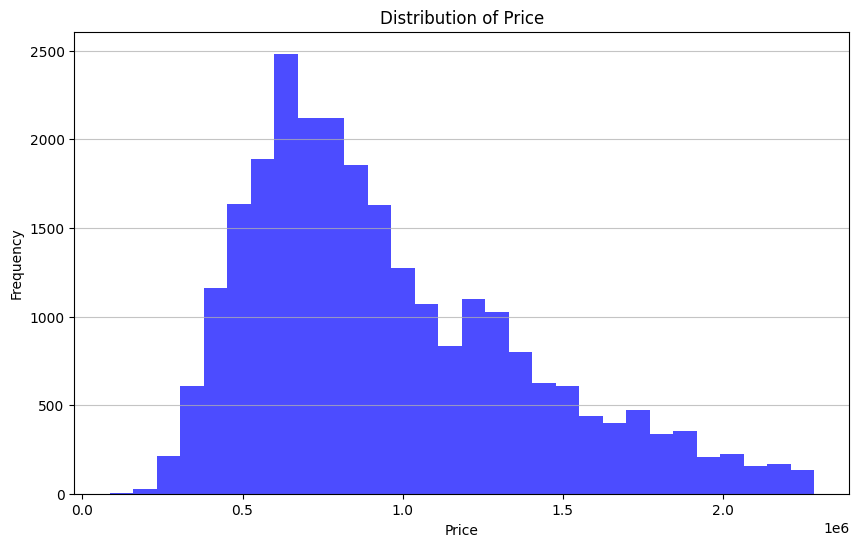

In [74]:
# Visualizing 'Price' distribution with filtered outlier data in a histogram

# Specifiying the column to be plotted
column_to_plot = 'Price'

# Creating a histogram of the specified column
plt.figure(figsize=(10, 6))
plt.hist(df_no_out_price[column_to_plot], bins=30, color='blue', alpha=0.7)
plt.title(f"Distribution of {column_to_plot}")
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

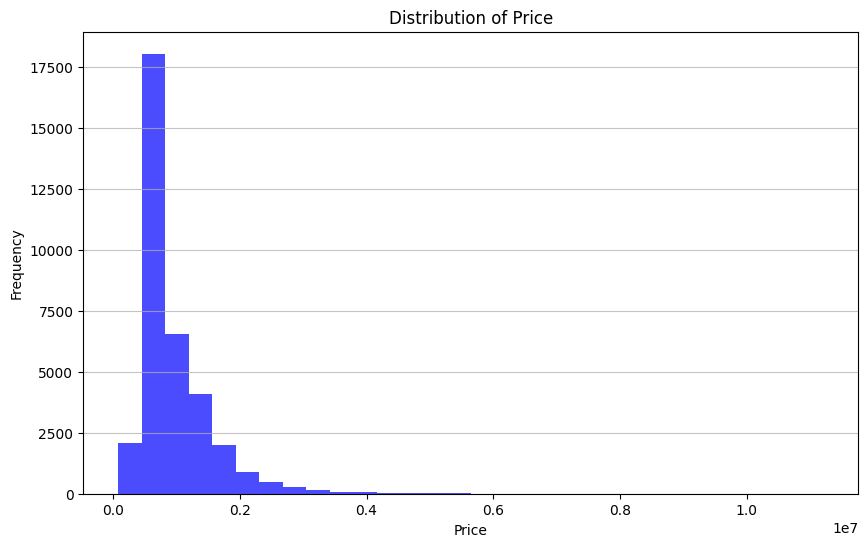

In [75]:
# Visualizing 'Price' distribution in a histogram

# Specifiying the column to be plotted
column_to_plot = 'Price'

# Creating a histogram of the specified column
plt.figure(figsize=(10, 6))
plt.hist(df_clear[column_to_plot], bins=30, color='blue', alpha=0.7)
plt.title(f"Distribution of {column_to_plot}")
plt.xlabel(column_to_plot)
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

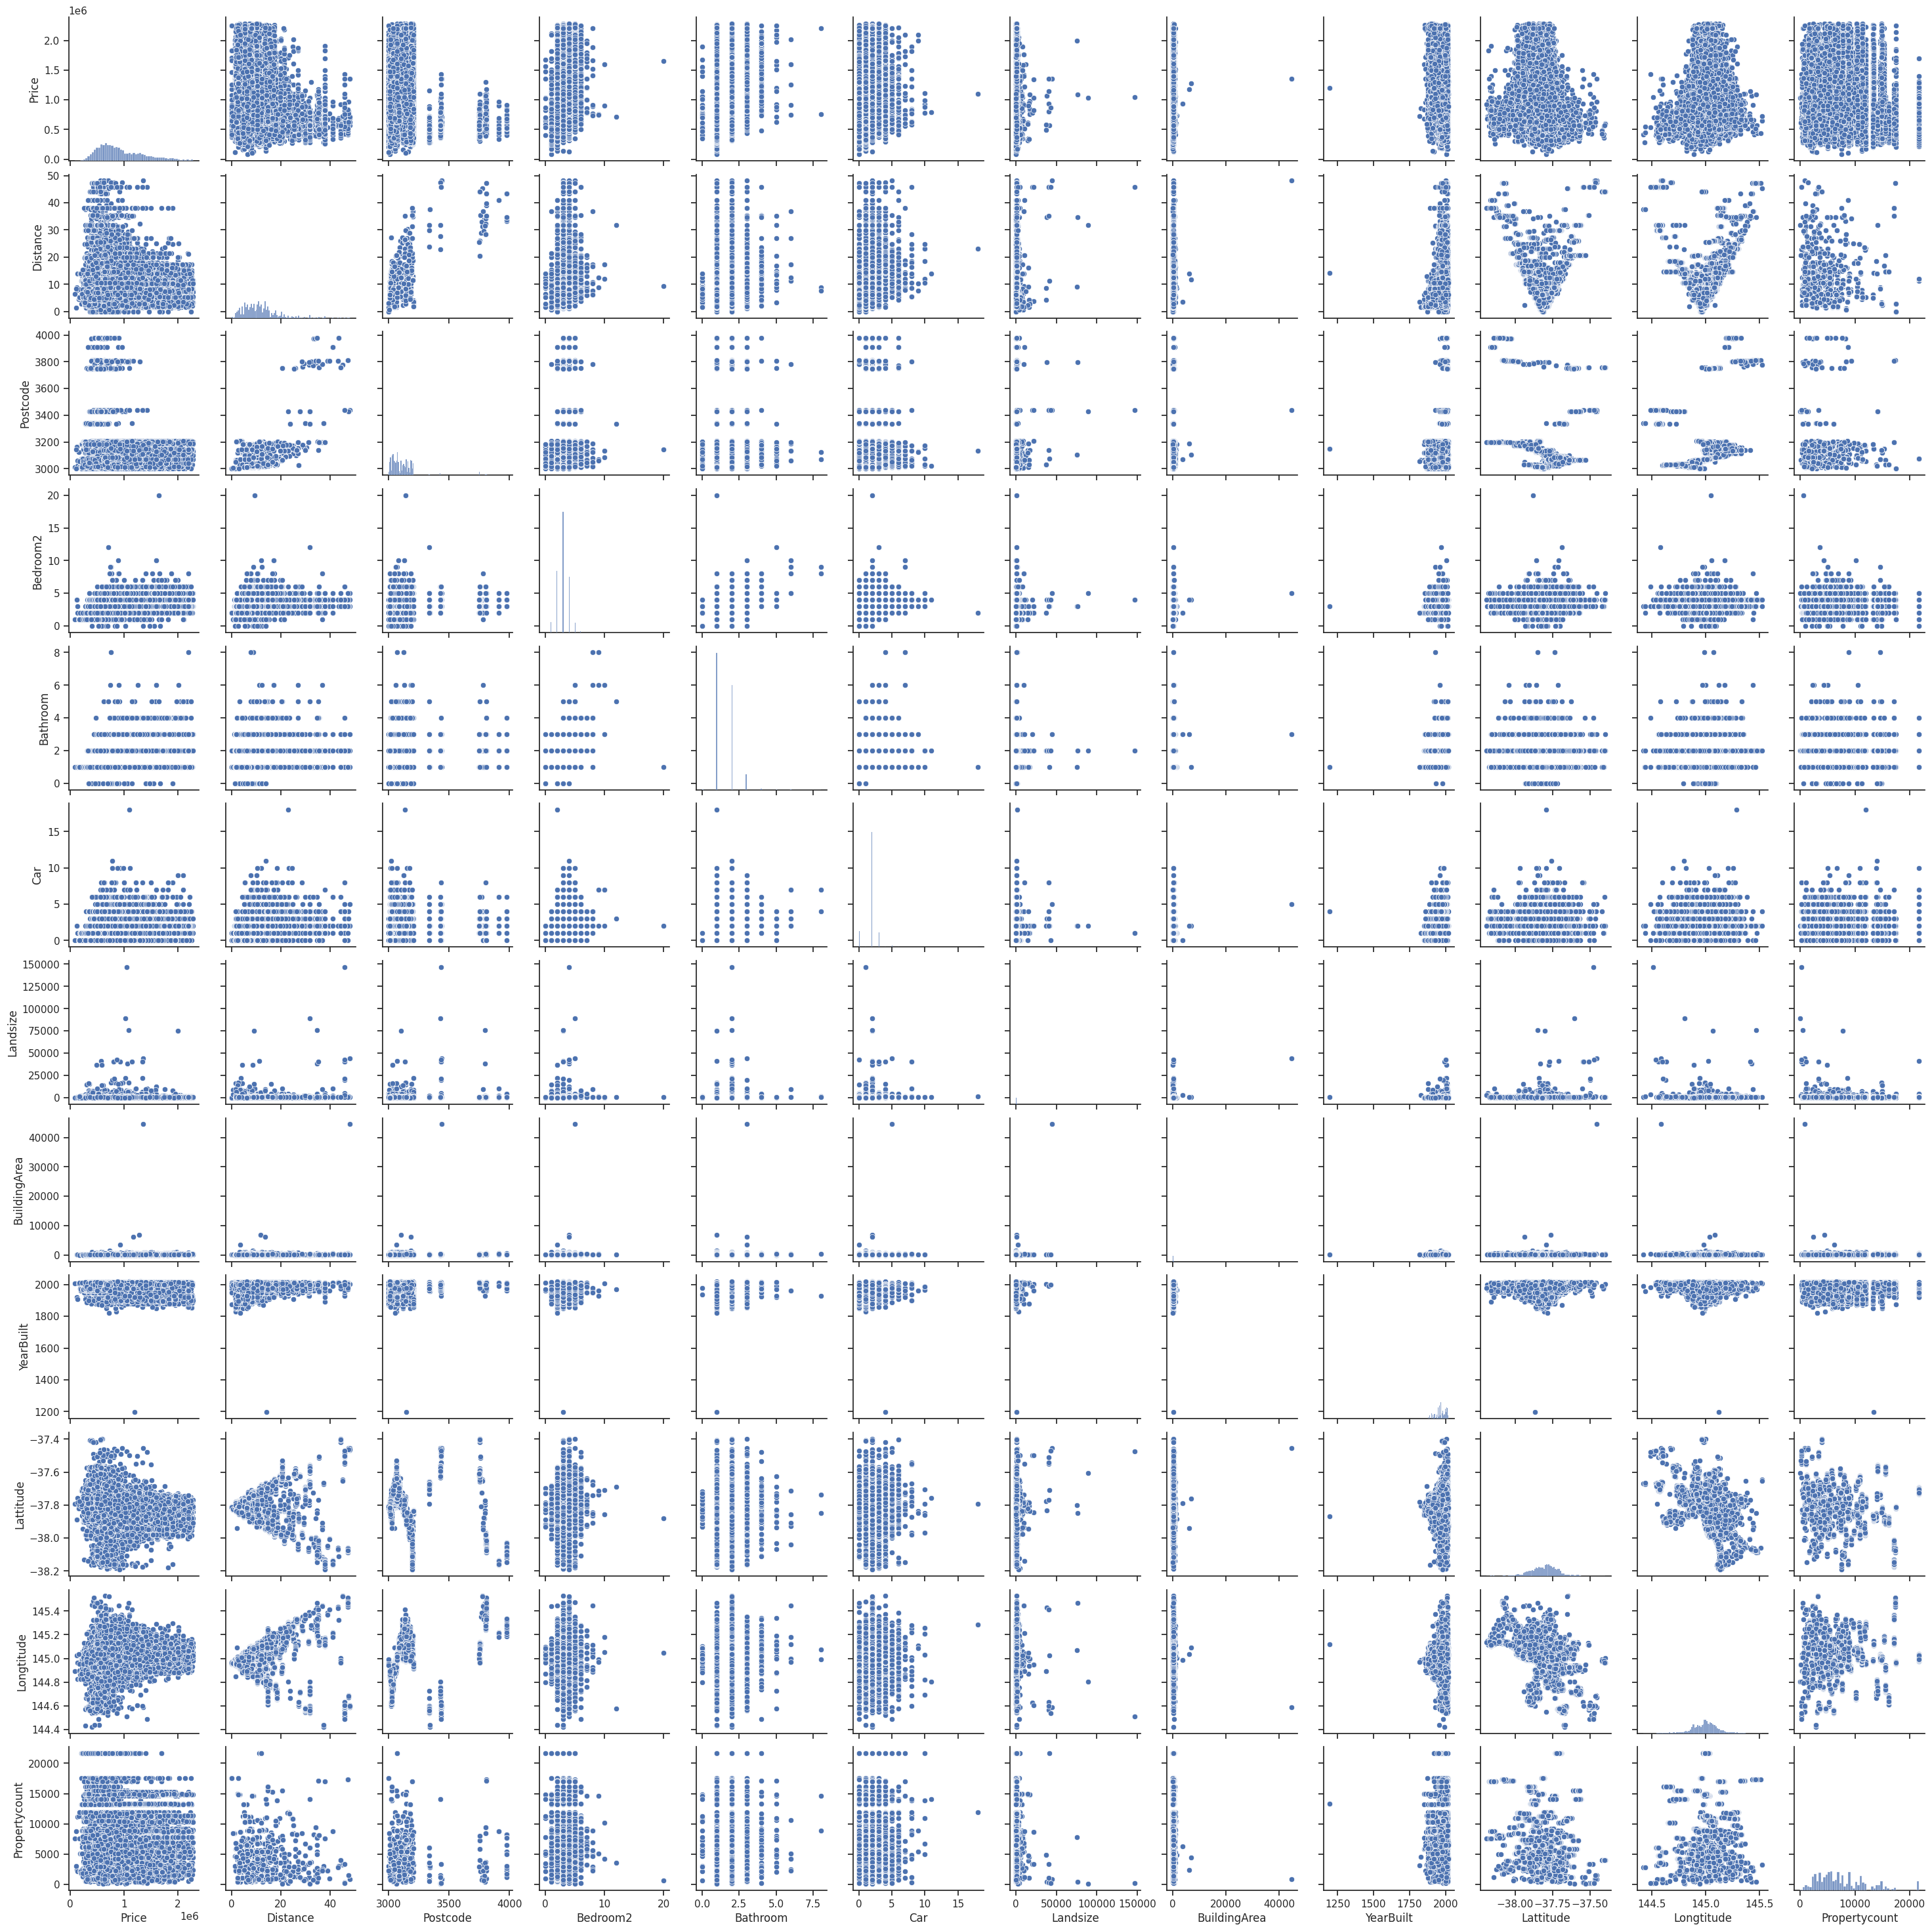

In [76]:
# Visualizing relationships between numerical variables and 'Price' variables with filtered outlier data

# Identifying all numerical variables available in the dataset
vars_no_out = df_no_out_price.select_dtypes(include='float64').columns

# Creating the pairplot to visualize relationships between numerical variables and 'Price' variables
sns.set(style='ticks')
scatterplot_matrix = sns.pairplot(df_no_out_price[vars_no_out])
plt.show()


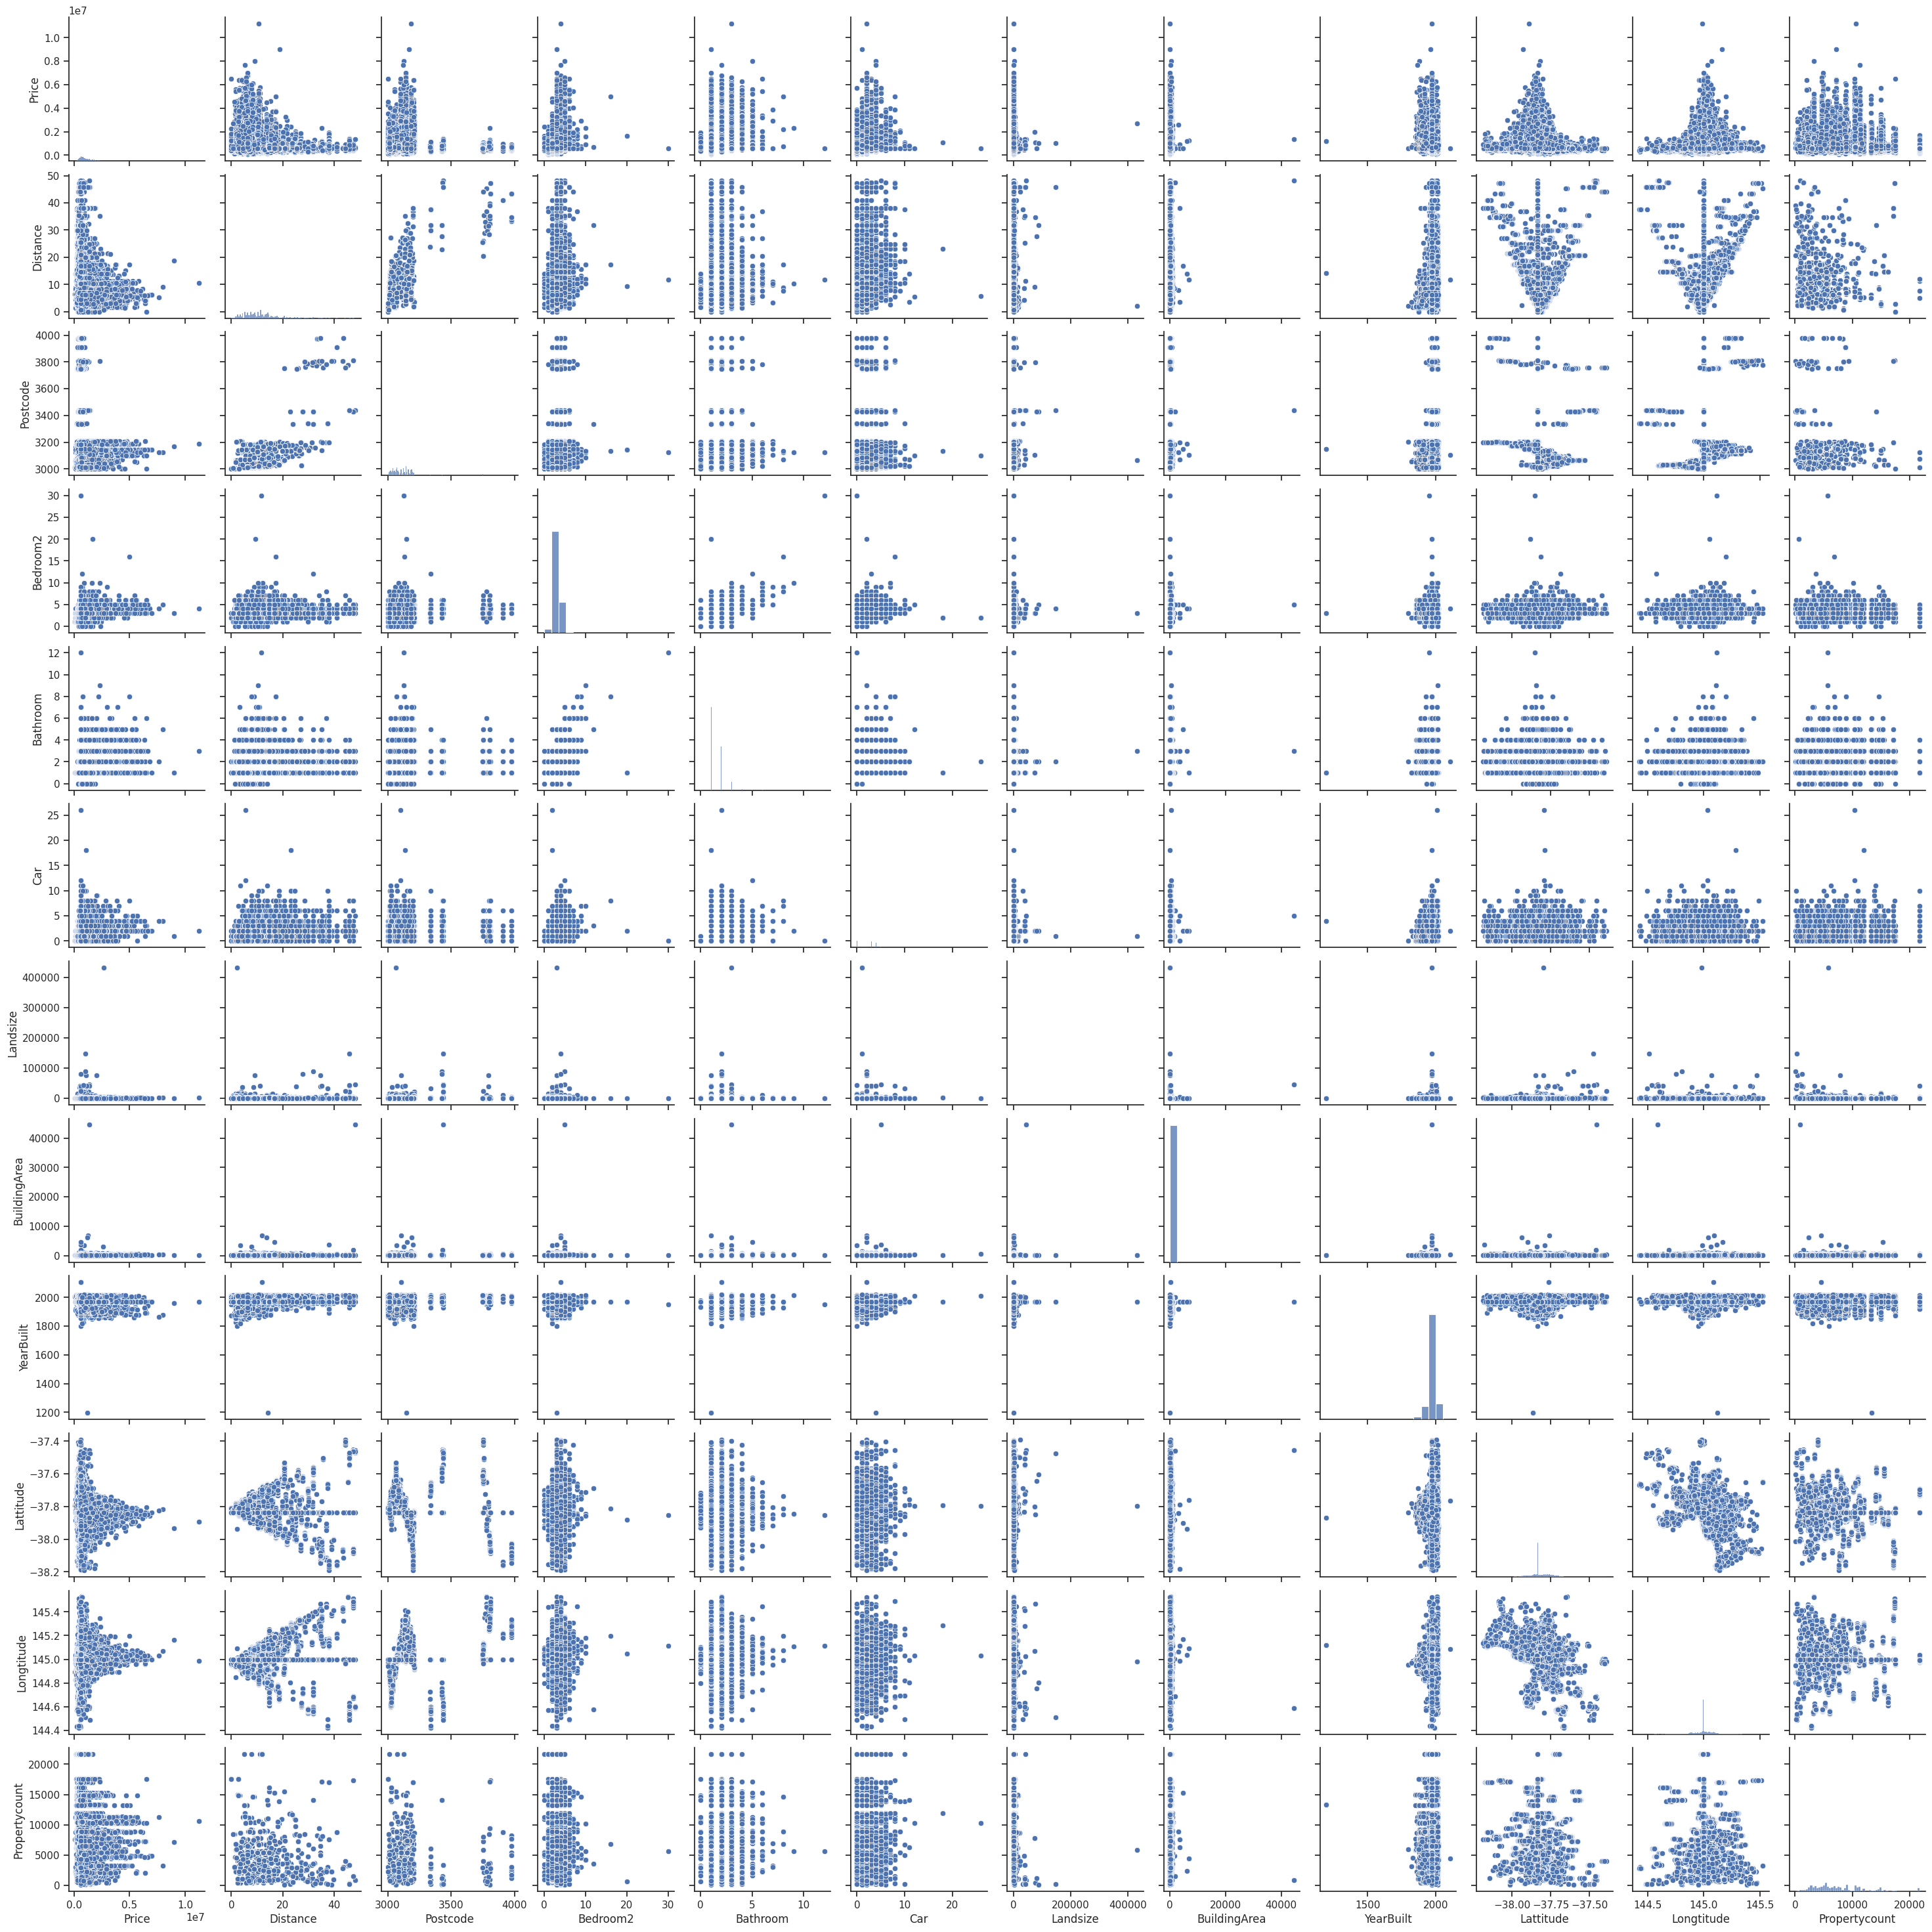

In [77]:
# Visualizing relationships between numerical variables and 'Price' variables

# Identifying all numerical variables available in the dataset
vars = df_clear.select_dtypes(include='float64').columns

# Creating the pairplot to visualize relationships between numerical variables and 'Price' variables
sns.set(style='ticks')
scatterplot_matrix = sns.pairplot(df_clear[vars])
plt.show()


<ipython-input-88-dfa55bc9662c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_clear.corr()


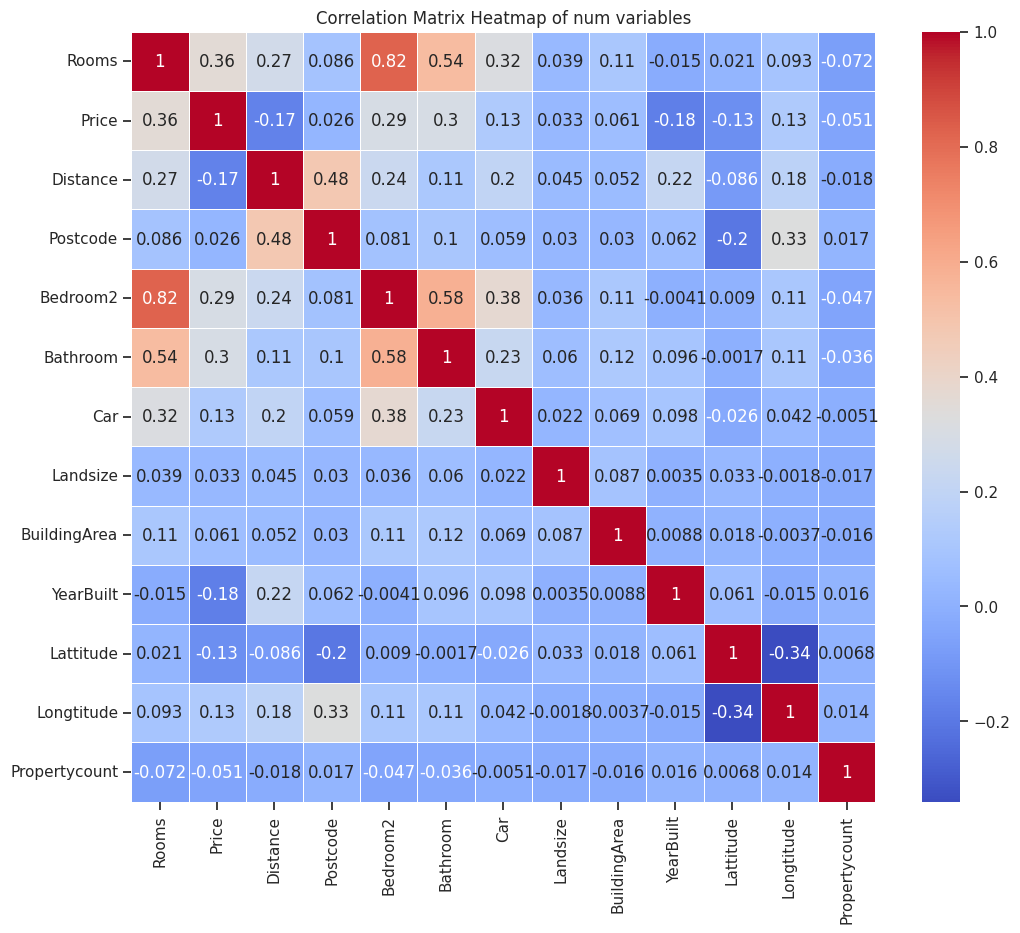

In [88]:
# Visualizing the correlaiton matrix using heatmap

# Calculating the correlation matrix
correlation_matrix = df_clear.corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Correlation Matrix Heatmap of num variables')
plt.show()

In [79]:
# Implementing Label Encoder for categorical variables

df_encoded = df_clear.copy()

label_encoder = LabelEncoder()

# Applying label encoding to categorical columns
categorical_columns = df_clear.select_dtypes(include='category').columns
for col in categorical_columns:
  df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

In [80]:
df_encoded

Suburb  Address  Rooms  Type      Price  Method  SellerG  Date  \
0           0    29458      2     0   600000.0       6      155    58   
1           0    32512      2     0  1480000.0       2       33    60   
2           0    15389      2     0  1035000.0       2       33    63   
3           0     9768      3     2   600000.0       7      296    63   
4           0    25128      3     0  1465000.0       5       33    64   
...       ...      ...    ...   ...        ...     ...      ...   ...   
34852     348     5862      4     0  1480000.0       0      152    38   
34853     348    16982      2     0   888000.0       5      321    38   
34854     348     7350      2     1   705000.0       2      152    38   
34855     348     5421      3     0  1140000.0       5      370    38   
34856     348    17743      2     0  1020000.0       0      276    38   

       Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0           2.5    3067.0  ...       1.0  1.0     126.0         120.0   
1           2.5    3067.0  ...       1.0  1.0     202.0         120.0   
2           2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3           2.5    3067.0  ...       2.0  1.0       0.0         120.0   
4           2.5    3067.0  ...       2.0  0.0     134.0         150.0   
...         ...       ...  ...       ...  ...       ...           ...   
34852       6.3    3013.0  ...       1.0  3.0     593.0         120.0   
34853       6.3    3013.0  ...       2.0  1.0      98.0         104.0   
34854       6.3    3013.0  ...       1.0  2.0     220.0         120.0   
34855       6.3    3013.0  ...       1.0  2.0       0.0         120.0   
34856       6.3    3013.0  ...       1.0  0.0     250.0         103.0   

       YearBuilt  CouncilArea  Lattitude  Longtitude  Regionname  \
0         1970.0           31  -37.80140   144.99580           2   
1         1970.0           31  -37.79960   144.99840           2   
2         1900.0           31  -37.80790   144.99340           2   
3         1970.0           31  -37.81140   145.01160           2   
4         1900.0           31  -37.80930   144.99440           2   
...          ...          ...        ...         ...         ...   
34852     1970.0           16  -37.81053   144.88467           6   
34853     2018.0           16  -37.81551   144.88826           6   
34854     2000.0           16  -37.82286   144.87856           6   
34855     1970.0           16  -37.83610   144.99660           6   
34856     1930.0           16  -37.81810   144.89351           6   

       Propertycount  
0             4019.0  
1             4019.0  
2             4019.0  
3             4019.0  
4             4019.0  
...              ...  
34852         6543.0  
34853         6543.0  
34854         6543.0  
34855         6543.0  
34856         6543.0  

[34856 rows x 21 columns]

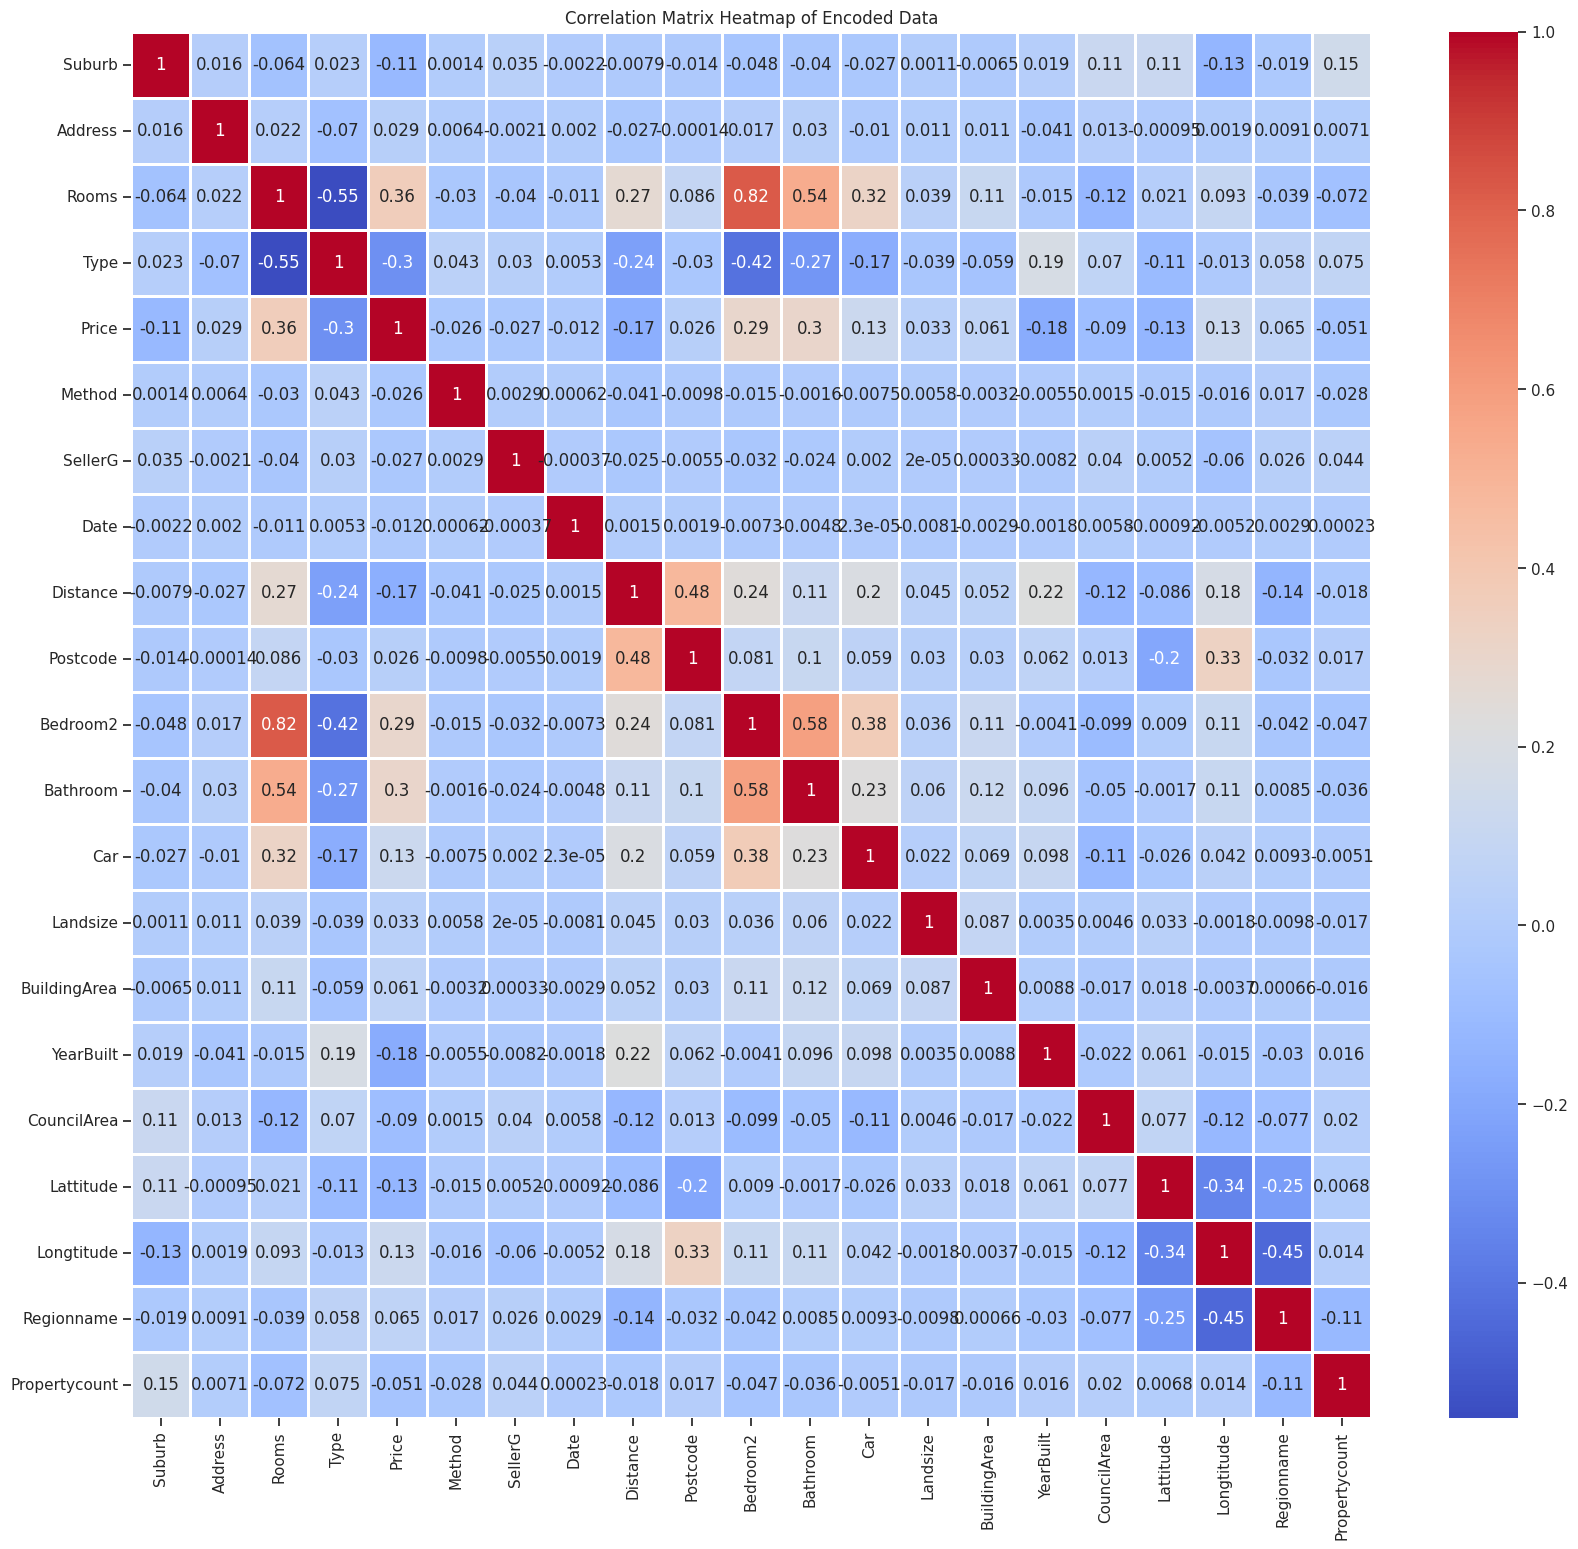

In [87]:
# Visualizing the correlation matrix of encoded data using heatmap

# Calculating the correlation matrix
correlation_matrix_encoded = df_encoded.corr()

# Creating a heatmap to visualize the correlation matrix of encoded data
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', linewidths=2)
plt.title('Correlation Matrix Heatmap of Encoded Data')
plt.show()

# '''The dataset is too big for my available memory. Out of this reason I have not executed this code for the visulaization of encoded data.
# If your memory is big enough to execute this visualization then enjoy it.'''

#**Model Selection**

In [89]:
# Making price estimation by training and testing preprocessed data

# Defining target variable and features
target_variable = 'Price'
X = df_encoded.drop(columns=[target_variable])
y = df_encoded[target_variable]

# Data Splitting: Splitting data into smaller sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
# Defining a dictionary of regression models
models = {
    'Lasso': {'model': Lasso()},
    'LinearRegression': {'model': LinearRegression()},
    'Ridge': {'model': Ridge()},
    'ElasticNet': {'model': ElasticNet()},
    'KNeighborsRegressor': {'model': KNeighborsRegressor()},
    'RandomForestRegressor': {'model': RandomForestRegressor()},
    'GradientBoostingRegressor': {'model': GradientBoostingRegressor()},
    'AdaBoostRegressor': {'model': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)}
}

#**Model Evaluation**

In [91]:
# Training and evaluating each model
for model_name, model_config in models.items():
  model = model_config['model']
  model.fit(X_train, y_train)
  y_pred = model.predict(X_train)
  mae = mean_absolute_error(y_train, y_pred)
  mse = mean_squared_error(y_train, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_train, y_pred)

  print(f"Model: {model_name}")
  print(f"Mean Absolute Error: {mae}")
  print(f"Mean Squared Error: {mse}")
  print(f"Root Mean Squared Error (RMSE): {rmse}")
  print(f"R-squared (R2): {r2}")
  print("--------------------")

Model: Lasso
Mean Absolute Error: 319780.90817086305
Mean Squared Error: 244951395857.75348
Root Mean Squared Error (RMSE): 494925.646797328
R-squared (R2): 0.31196493666780634
--------------------
Model: LinearRegression
Mean Absolute Error: 319781.01923988294
Mean Squared Error: 244951395613.26294
Root Mean Squared Error (RMSE): 494925.64655033074
R-squared (R2): 0.3119649373545469
--------------------
Model: Ridge
Mean Absolute Error: 319777.3432355551
Mean Squared Error: 244951547828.68185
Root Mean Squared Error (RMSE): 494925.8003263538
R-squared (R2): 0.31196450980219503
--------------------
Model: ElasticNet
Mean Absolute Error: 334845.0930420601
Mean Squared Error: 257771048808.89676
Root Mean Squared Error (RMSE): 507711.5803375936
R-squared (R2): 0.27595627993306904
--------------------
Model: KNeighborsRegressor
Mean Absolute Error: 311969.82322478836
Mean Squared Error: 226219458404.60422
Root Mean Squared Error (RMSE): 475625.3340651696
R-squared (R2): 0.3645803942232988
